In [5]:
# Core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
# Load RFM dataset
df = pd.read_csv(r"D:\Projects\Online Retail\RFM_OnlineRetail.csv" , header=None)

# Assign proper column names
df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(df.head())
print(df.columns)

   CustomerID  Recency  Frequency      Monetary
0       12626       23          9   6620.479955
1       14819       64          2    272.069999
2       13089        2         97  58825.829824
3       17453       17          2    486.719993
4       13359       63          1    439.560000
Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')


In [25]:
# Dataset Shape
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (4339, 4)
   CustomerID  Recency  Frequency      Monetary
0       12626       23          9   6620.479955
1       14819       64          2    272.069999
2       13089        2         97  58825.829824
3       17453       17          2    486.719993
4       13359       63          1    439.560000


In [9]:
# Check for missing values
print(df.isnull().sum())


12626               0
23                  0
9                   0
6620.47995525599    0
dtype: int64


In [10]:
# Drop nulls if any
df = df.dropna()


In [28]:
# Scaling the dataset (Feature Scaling)
scaler = StandardScaler()
X = scaler.fit_transform(df[['Recency','Frequency','Monetary']])


In [30]:
print(df.columns)
print(df.head())


Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')
   CustomerID  Recency  Frequency      Monetary
0       12626       23          9   6620.479955
1       14819       64          2    272.069999
2       13089        2         97  58825.829824
3       17453       17          2    486.719993
4       13359       63          1    439.560000


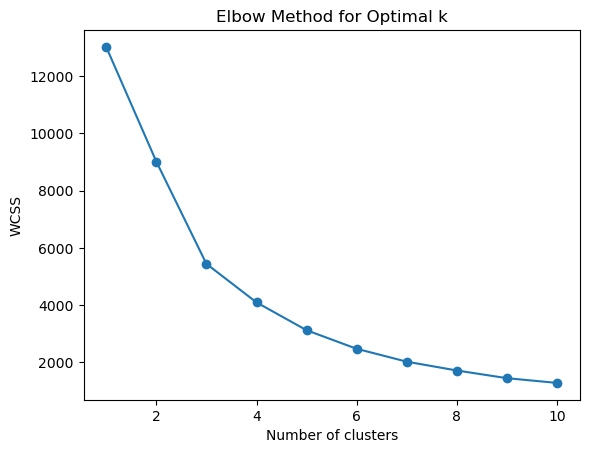

In [31]:
# Elbow Method (Find Optimal k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


===== k=3 Cluster Summary =====
             Recency  Frequency      Monetary
Cluster3                                     
0          40.852495   4.676170   1856.644071
1         246.220074   1.581031    632.140244
2           5.461538  66.500000  85904.350994

===== k=4 Cluster Summary =====
             Recency  Frequency       Monetary
Cluster4                                      
0          15.123223  22.047393   12453.225833
1          43.477079   3.655206    1349.382619
2           6.615385  82.692308  127338.313059
3         248.173421   1.551367     478.194730


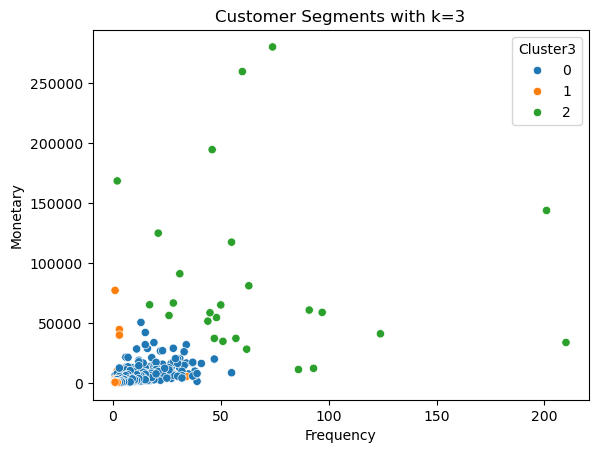

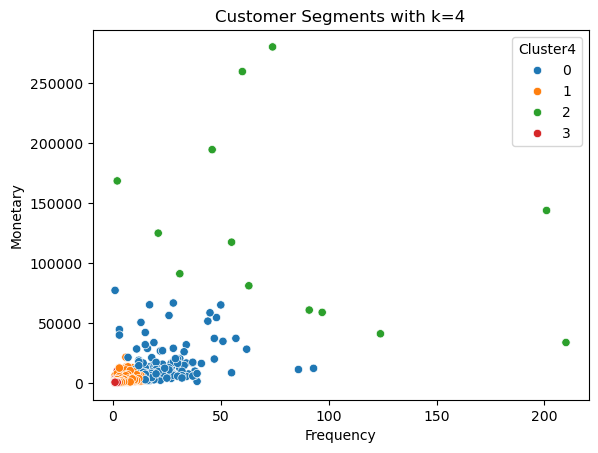

In [33]:
# Try KMeans with k=3
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster3'] = kmeans3.fit_predict(X)

# Try KMeans with k=4
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster4'] = kmeans4.fit_predict(X)

# Compare average RFM values for each option
print("===== k=3 Cluster Summary =====")
print(df.groupby('Cluster3')[['Recency','Frequency','Monetary']].mean())

print("\n===== k=4 Cluster Summary =====")
print(df.groupby('Cluster4')[['Recency','Frequency','Monetary']].mean())

# Plot k=3 clusters
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='Cluster3', palette='tab10')
plt.title("Customer Segments with k=3")
plt.show()

# Plot k=4 clusters
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='Cluster4', palette='tab10')
plt.title("Customer Segments with k=4")
plt.show()


In [35]:
# Train KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Verify
print(df.head())


   CustomerID  Recency  Frequency      Monetary  Cluster3  Cluster4  Cluster
0       12626       23          9   6620.479955         0         1        1
1       14819       64          2    272.069999         0         1        1
2       13089        2         97  58825.829824         2         2        2
3       17453       17          2    486.719993         0         1        1
4       13359       63          1    439.560000         0         1        1


Cluster Summary (k=4):
             Recency  Frequency       Monetary
Cluster                                      
0         15.123223  22.047393   12453.225833
1         43.477079   3.655206    1349.382619
2          6.615385  82.692308  127338.313059
3        248.173421   1.551367     478.194730

Customer counts per cluster:
 Cluster
1    3054
3    1061
0     211
2      13
Name: count, dtype: int64


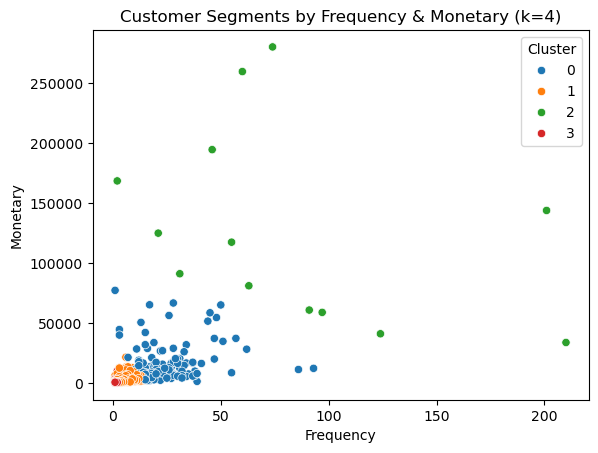

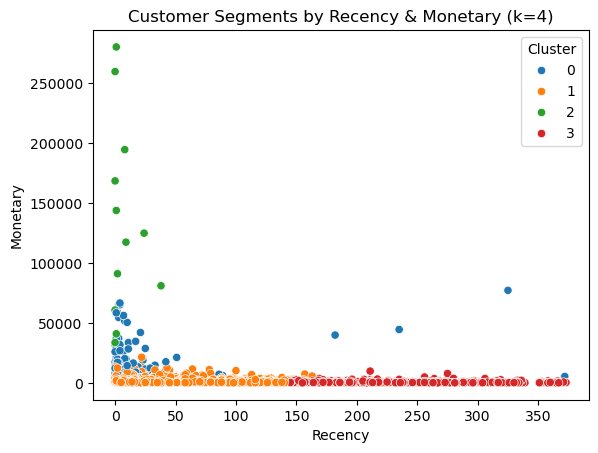

In [36]:
# Average values by cluster
summary = df.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()
print("Cluster Summary (k=4):\n", summary)

# Customer count per cluster
print("\nCustomer counts per cluster:\n", df['Cluster'].value_counts())

# Scatterplots for visualization
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='Cluster', palette='tab10')
plt.title("Customer Segments by Frequency & Monetary (k=4)")
plt.show()

sns.scatterplot(data=df, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title("Customer Segments by Recency & Monetary (k=4)")
plt.show()


In [37]:
# Map cluster IDs to business-friendly labels
cluster_map = {
    0: "Loyal Customers",
    1: "Occasional Shoppers",
    2: "Super VIPs",
    3: "Churned Customers"
}

df['ClusterLabel'] = df['Cluster'].map(cluster_map)

# Verify
print(df[['CustomerID','Recency','Frequency','Monetary','Cluster','ClusterLabel']].head())


   CustomerID  Recency  Frequency      Monetary  Cluster         ClusterLabel
0       12626       23          9   6620.479955        1  Occasional Shoppers
1       14819       64          2    272.069999        1  Occasional Shoppers
2       13089        2         97  58825.829824        2           Super VIPs
3       17453       17          2    486.719993        1  Occasional Shoppers
4       13359       63          1    439.560000        1  Occasional Shoppers


In [38]:
df.groupby("ClusterLabel")[["Recency","Frequency","Monetary"]].mean()


,Recency,Frequency,Monetary
ClusterLabel,,,
Churned Customers,248.173421,1.551367,478.194730
Loyal Customers,15.123223,22.047393,12453.225833
Occasional Shoppers,43.477079,3.655206,1349.382619
Super VIPs,6.615385,82.692308,127338.313059


C:\Users\abhay\AppData\Local\Temp\ipykernel_35608\1926360171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ClusterLabel', data=df, order=df['ClusterLabel'].value_counts().index, palette="Set2")


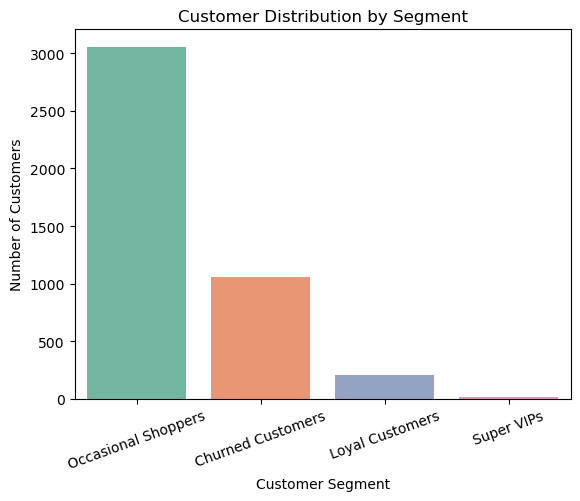

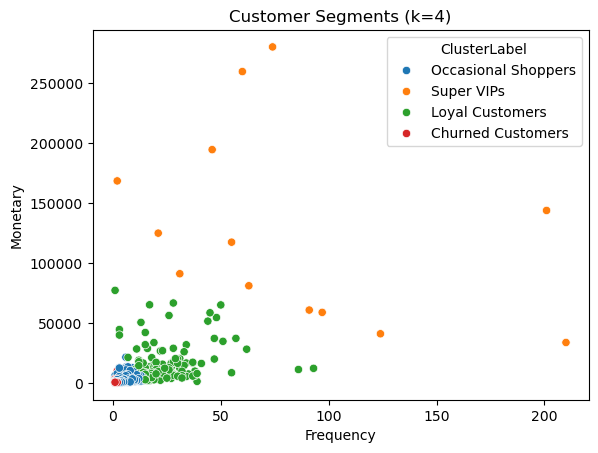

In [39]:
# Bar chart: Number of customers per cluster
sns.countplot(x='ClusterLabel', data=df, order=df['ClusterLabel'].value_counts().index, palette="Set2")
plt.title("Customer Distribution by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=20)
plt.show()

# Scatter: Frequency vs Monetary with labels
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='ClusterLabel', palette='tab10')
plt.title("Customer Segments (k=4)")
plt.show()


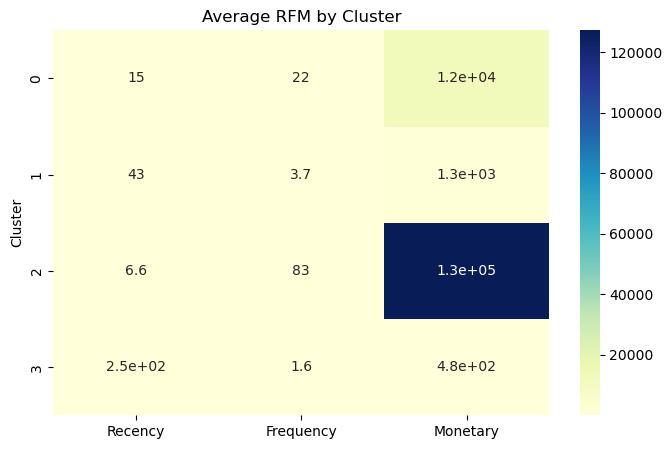

In [40]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(df.groupby('Cluster')[['Recency','Frequency','Monetary']].mean(), annot=True, cmap="YlGnBu")
plt.title("Average RFM by Cluster")
plt.show()


In [41]:
df.to_csv("RFM_Clusters.csv", index=False)
print("Clustered dataset with labels saved as RFM_Clusters.csv")


Clustered dataset with labels saved as RFM_Clusters.csv


In [42]:
import os
print(os.getcwd())


C:\Users\abhay
